In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [2]:
import numpy as np
import pickle

In [3]:
parent_dir = os.path.abspath('..')
test_file = '/data/sentences/test.pkl'
with open(parent_dir+test_file, 'rb') as f:
    [text, X_emb] = pickle.load(f)

In [5]:
print(len(text))
print(X_emb.shape)

1500
(1500, 512)


In [6]:
from core.DimReduction import DimReduction
from util.plot_bokeh_embedding import plot_embedding

In [17]:
dim_red = DimReduction(3)
X_tsne = dim_red.fit_transform(X_emb, 'tsne')

In [21]:
n_plot = 100
X_plot = X_tsne[:n_plot]
labels_plot = text[:n_plot]

In [19]:
import bokeh.plotting as bp
from bokeh.plotting import save, show
from bokeh.models.glyphs import Text
from bokeh.models import HoverTool
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap


output_notebook()

Loading BokehJS ...

In [22]:
from bokeh.palettes import Set1

plot_fig = bp.figure(plot_width=800, plot_height=600,
                     tools="pan, wheel_zoom, box_zoom, reset, hover, previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)

# Use the third dimension as the color map
if X_plot.shape[1] == 3:
    colors = X_plot[:,2]
    mapper = linear_cmap(field_name='colors', palette=Set1[6] ,low=min(colors) ,high=max(colors))
    source = bp.ColumnDataSource(dict(x=X_plot[:,0], y=X_plot[:,1], text=labels_plot, colors=colors))
    plot_fig.text("x", "y", text="text", text_font_size='10px', text_color=mapper, source=source)
else:
    source = bp.ColumnDataSource(dict(x=X_plot[:,0], y=X_plot[:,1], text=labels_plot))
    plot_fig.text("x", "y", text="text", text_font_size='10px', source=source)

show(plot_fig)

In [27]:
filename = '/data/sentences/sentence_polarity/rt-polarity.pos'
filename = parent_dir + filename
pos_sentences = []
with open(filename, "r") as f:
    for line in f:
        pos_sentences.append(line)

In [29]:
len(pos_sentences)

5331

In [30]:
filename = '/data/sentences/sentence_polarity/rt-polarity.neg'
filename = parent_dir + filename
neg_sentences = []
with open(filename, "r") as f:
    for line in f:
        neg_sentences.append(line)

In [31]:
len(neg_sentences)

5331

In [32]:
pos_labels = [1] * len(pos_sentences)
neg_labels = [0] * len(neg_sentences)

In [33]:
all_sentences = pos_sentences + neg_sentences
all_labels = pos_labels + neg_labels

In [36]:
import pandas as pd

In [37]:
data_dict = {'sentences': all_sentences, 'labels': all_labels}
df = pd.DataFrame(data_dict)

In [39]:
outfile = parent_dir + '/data/sentences/polarity.csv'
df.to_csv(outfile, index=False)

In [40]:
parent_dir = os.path.abspath('..')
test_file = '/data/sentences/polarity_emb.pkl'
with open(parent_dir+test_file, 'rb') as f:
    [text, X_emb] = pickle.load(f)

In [41]:
dim_red = DimReduction(2)
X_tsne_2 = dim_red.fit_transform(X_emb, 'tsne')

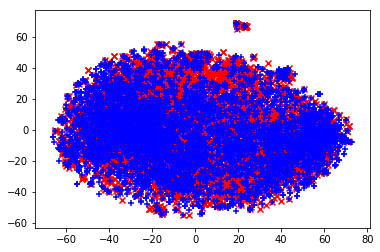

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_tsne_2[:5331,0], X_tsne_2[:5331,1], marker='x', c='r')
plt.scatter(X_tsne_2[5331:,0], X_tsne_2[5331:,1], marker='+', c='b')
plt.show()